Q1. What is Simple Linear Regression?

Answer:
Simple Linear Regression is a statistical method used to model the relationship between one independent variable (X) and one dependent variable (Y).
It fits a straight line using:

𝑌
=
𝑏
0
+
𝑏
1
𝑋
Y=b
0
	​

+b
1
	​

X

where:

𝑏
0
b
0
	​

 = intercept

𝑏
1
b
1
	​

 = slope

The goal is to predict Y based on the value of X.

Q2. Key assumptions of Simple Linear Regression

Answer:

Linearity – Relationship between X and Y is linear.

Independence of errors – Residuals are independent.

Homoscedasticity – Constant variance of residuals.

Normality of errors – Residuals follow a normal distribution.

No significant outliers – Extreme points distort the line.

Q3. What is heteroscedasticity? Why important?

Answer:
Heteroscedasticity occurs when the spread of residuals is not constant across all levels of X.

Why important?

Leads to biased standard errors

Makes confidence intervals unreliable

Reduces model efficiency

Can cause wrong conclusions in hypothesis testing

Detecting & correcting it improves model reliability.

Q4. What is Multiple Linear Regression?

Answer:
Multiple Linear Regression is used to model the relationship between two or more independent variables and one dependent variable.

𝑌
=
𝑏
0
+
𝑏
1
𝑋
1
+
𝑏
2
𝑋
2
+
.
.
.
+
𝑏
𝑛
𝑋
𝑛
Y=b
0
	​

+b
1
	​

X
1
	​

+b
2
	​

X
2
	​

+...+b
n
	​

X
n
	​


It helps in prediction and understanding how each variable influences the output.

Q5. What is polynomial regression? How does it differ from linear regression?

Answer:
Polynomial regression fits a curve instead of a straight line by including higher-degree terms:

𝑌
=
𝑏
0
+
𝑏
1
𝑋
+
𝑏
2
𝑋
2
Y=b
0
	​

+b
1
	​

X+b
2
	​

X
2

Difference from Linear Regression:

Linear regression → straight line

Polynomial regression → curves, handles non-linear patterns

Still a linear model in terms of coefficients

Slope: 1.9800000000000004
Intercept: 0.17999999999999794


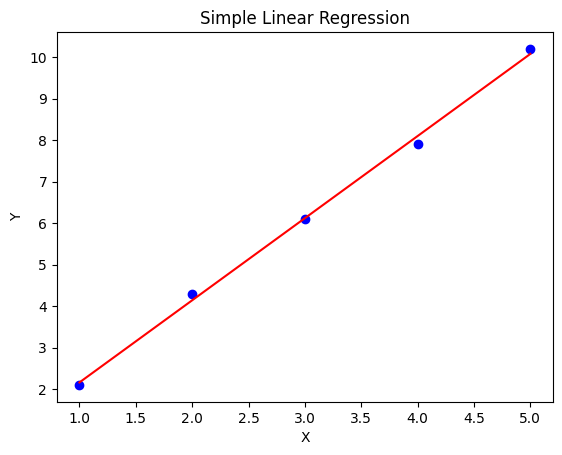

In [6]:
#Q6. Simple Linear Regression on X & Y + Plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='red')
plt.title("Simple Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


#Q7. Multiple Linear Regression + VIF
Data

Area = [1200, 1500, 1800, 2000]

Rooms = [2, 3, 3, 4]

Price = [250000, 300000, 320000, 370000]

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.DataFrame({
    "Area": [1200, 1500, 1800, 2000],
    "Rooms": [2, 3, 3, 4],
    "Price": [250000, 300000, 320000, 370000]
})

X = df[["Area", "Rooms"]]
y = df["Price"]

model = LinearRegression()
model.fit(X, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_df)


Coefficients: [   63.15789474 34736.84210526]
Intercept: 103157.89473684214
  Feature         VIF
0    Area  127.796923
1   Rooms  127.796923


Q8. Polynomial Regression (Degree 2) + Plot
Data:

X = [1, 2, 3, 4, 5]
Y = [2.2, 4.8, 7.5, 11.2, 14.7]

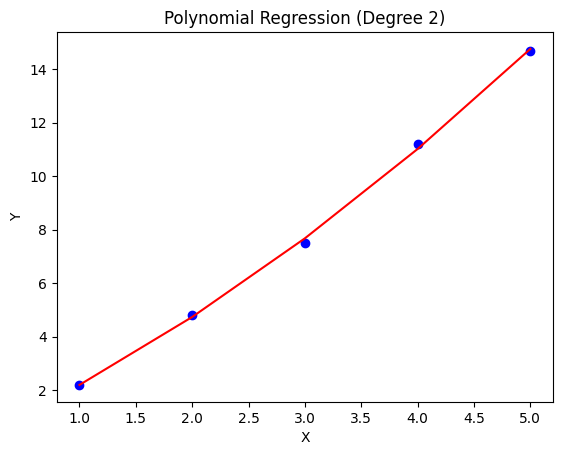

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1,2,3,4,5]).reshape(-1,1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

Y_pred = model.predict(X_poly)

plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='red')
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


Q9. Residual Plot + Check Heteroscedasticity
Data:

X = [10, 20, 30, 40, 50]
Y = [15, 35, 40, 50, 65]

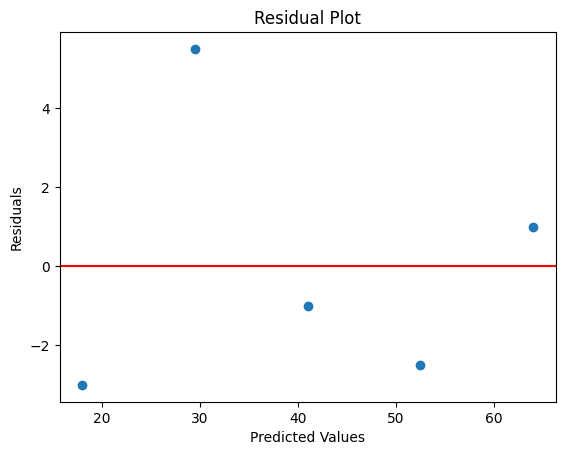

[-3.   5.5 -1.  -2.5  1. ]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10,20,30,40,50]).reshape(-1,1)
Y = np.array([15,35,40,50,65])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)
residuals = Y - Y_pred

plt.scatter(Y_pred, residuals)
plt.axhline(0, color='red')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

print(residuals)


Q10. How to fix heteroscedasticity & multicollinearity in real estate model.
To build a robust house-price prediction model:

1. Fix Heteroscedasticity

✔ Apply log transform on target variable:

𝑃
𝑟
𝑖
𝑐
𝑒
′
=
log
⁡
(
𝑃
𝑟
𝑖
𝑐
𝑒
)
Price
′
=log(Price)

✔ Use Weighted Least Squares
✔ Remove extreme outliers
✔ Apply Box-Cox transformation

2. Fix Multicollinearity

✔ Check VIF values
✔ Remove correlated features (e.g., keep either "Area" OR "Rooms")
✔ Use dimensionality reduction (PCA)
✔ Combine variables into indices (e.g., Quality Score)

3. Improve Model Performance

✔ Standardize features
✔ Use regularization models

Ridge Regression

Lasso Regression

These reduce coefficient instability.

4. Validate Model

✔ Train/test split
✔ Cross-validation
✔ Check residuals
✔ Check R², MAE, RMSE

5. Explain to Stakeholders

Cleaner model → more stable predictions

Eliminates noise from correlated variables

Corrects variance issues

Improves trust & decision-making